In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


EDA    

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

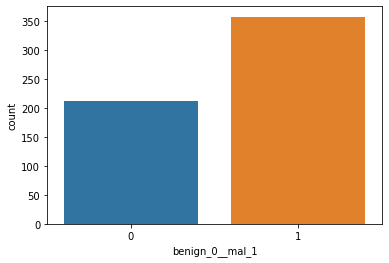

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

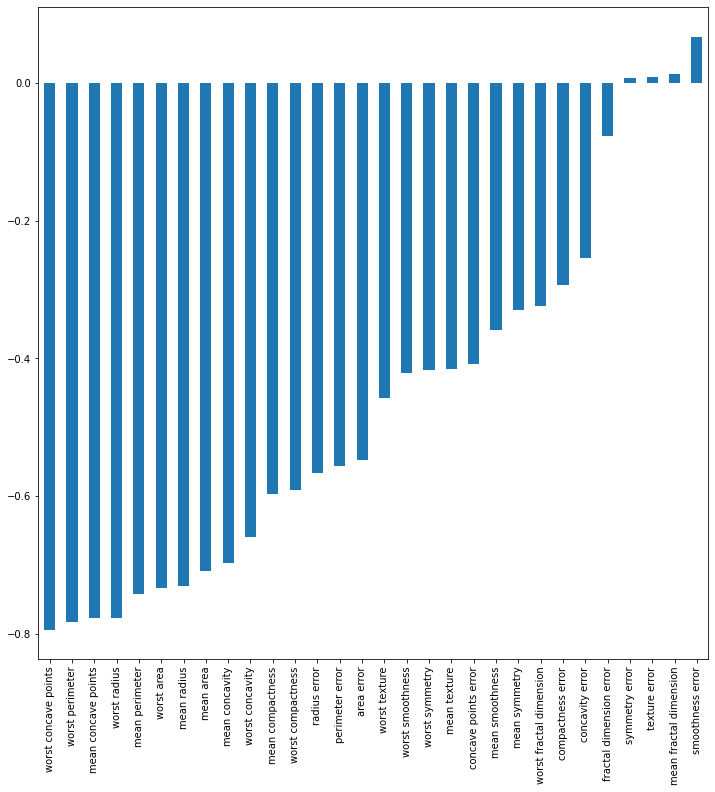

In [13]:
plt.figure(figsize=(12,12))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [108]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1']

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
X_train = scaler.fit_transform(X_train)

In [114]:
X_test = scaler.transform(X_test)

MODEL

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [115]:
X_train.shape

(426, 30)

In [116]:
y_train.shape

(426,)

In [117]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [118]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7031 - val_loss: 0.6770
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6721 - val_loss: 0.6438
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6400 - val_loss: 0.6049
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6019 - val_loss: 0.5577
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5550 - val_loss: 0.4985
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4984 - val_loss: 0.4325
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4383 - val_loss: 0.3723
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3835 - val_loss: 0.3192
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3371 - val_loss: 0.2761
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2977 - val_loss: 0.2409
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0476 - val_loss: 0.0566
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0470 - val_loss: 0.0574
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0476 - val_loss: 0.0566
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.0506
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.0526
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.0522
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0465 - val_loss: 0.0503
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0639
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0442 - val_loss: 0.0493
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0444 - val_loss: 0.0530
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.0566
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.0619
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.0617
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0599
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.0601
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.0559
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0634
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0619
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0665
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0248 - val_loss: 0.0583
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0755
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.0843
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0975
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0770
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0900
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.0812
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0985
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0873
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0881
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0859
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.1105
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.1278
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1326
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.1107
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.1252
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.1175
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.1423
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.1231
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.1237
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.1499
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.1562
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.1735
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.1617
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.1583
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.1572
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.1873
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.1506
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.1773
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.1705
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.1749
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.2173
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.1916
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.2454
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.2015
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.2272
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.2010
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.2252
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.2098
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.2162
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.2112
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 9.3516e-04 - val_loss: 0.2506
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 9.5786e-04 - val_loss: 0.2531
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 9.0550e-04 - val_loss: 0.2501
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 9.1561e-04 - val_loss: 0.2525
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 8.5951e-04 - val_loss: 0.2471
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 8.6690e-04 - val_loss: 0.2530
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 8.4240e-04 - val_loss: 0.2529
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 8.2188e-04 - val_loss: 0.2553
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 8.3694e-04 - val_loss: 0.2523
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - 

In [119]:
losses = pd.DataFrame(model.history.history)

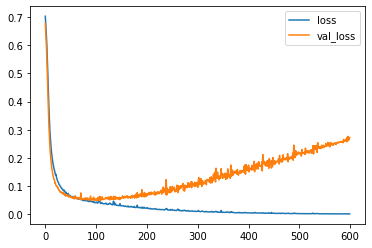

In [120]:
losses.plot()
# trained too much, epochs too much

EARLY STOPPING

In [142]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [143]:
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) # want to min losses

In [145]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6806 - val_loss: 0.6560
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6504 - val_loss: 0.6232
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6172 - val_loss: 0.5835
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5743 - val_loss: 0.5260
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5207 - val_loss: 0.4643
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4665 - val_loss: 0.4074
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4165 - val_loss: 0.3574
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3729 - val_loss: 0.3141
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3348 - val_loss: 0.2755
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3042 - val_loss: 0.2480
Epoch 11/

14/14 [==============================] - 0s 4ms/step - loss: 0.0553 - val_loss: 0.0587
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.0510
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.0538
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0511 - val_loss: 0.0492
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.0519
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0582 - val_loss: 0.0482
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.0571
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0637 - val_loss: 0.0490
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.0536
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.0494
Epoch 93/600


In [146]:
model_losses = pd.DataFrame(model.history.history)

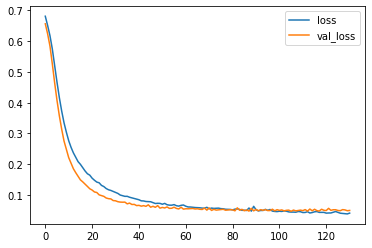

In [147]:
model_losses.plot()

In [148]:
predictions = model.predict_classes(X_test)

In [149]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [150]:
print(confusion_matrix(y_test,predictions))

[[52  2]
 [ 1 88]]


DROPOUT LAYERS

In [131]:
from tensorflow.keras.layers import Dropout

In [133]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # 1 means 100% of neurons are going to be turn off randomly

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [134]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7063 - val_loss: 0.6686
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6826 - val_loss: 0.6543
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6722 - val_loss: 0.6383
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6596 - val_loss: 0.6201
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6321 - val_loss: 0.5997
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6325 - val_loss: 0.5759
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5510
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5803 - val_loss: 0.5238
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5600 - val_loss: 0.4933
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5424 - val_loss: 0.4617
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1241 - val_loss: 0.0670
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1487 - val_loss: 0.0619
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1418 - val_loss: 0.0618
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1294 - val_loss: 0.0601
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1445 - val_loss: 0.0606
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.0604
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1211 - val_loss: 0.0589
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1091 - val_loss: 0.0570
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1139 - val_loss: 0.0587
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1075 - val_loss: 0.0574
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0564 - val_loss: 0.0515
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0832 - val_loss: 0.0475
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0956 - val_loss: 0.0528
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0725 - val_loss: 0.0510
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0756 - val_loss: 0.0486
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0852 - val_loss: 0.0507
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0831 - val_loss: 0.0474
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0792 - val_loss: 0.0471
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0777 - val_loss: 0.0466
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0806 - val_loss: 0.0475
Epoc

In [135]:
model_loss = pd.DataFrame(model.history.history)

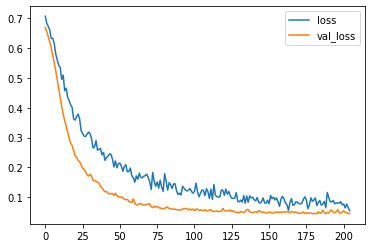

In [136]:
model_loss.plot()

In [137]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [139]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [141]:
print(confusion_matrix(y_test,predictions))

[[53  1]
 [ 1 88]]
